# DIC4/587: Phase 2
*Contributors: Seungmin Lee, David Huang*

---
## Deliverables

1. Algorithms/Visualizations: Apply 5 different significant and relevant
algorithms (ML, MR, and/or statistical models) to your data and create visualizations for
the results. 
    - For 487 students: at least 1 of the 5 algorithms must be one that was not
discussed in class. 
    - For 587 students: at least 2 must be from outside of class. 
    - These outside algorithms can come from the class textbooks, or other sources. Cite the appropriate sources for each outside algorithm you choose to apply.
2. Explanation and Analysis: For each of the 5 above algorithms, provide
justification for why you chose the particular algorithm, and discuss the effectiveness of
the algorithm when applied to your data to answer questions related to your problem
statement. 
    - This should include discussion of any relevant metrics for demonstrating
model effectiveness, as well as any intelligence you were able to gain from application of
the algorithm to your data.


## Ideas
- Incorperating word count into Naive Bayes Classification for description of what the permits were used for (ex. swimming pool reno)
- Log Regression

*Note: Disregarding driveway/sidewalks*

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('Dataset/ICP_Residential_Austin2017up.csv')
data.shape

(55976, 61)

In [3]:
'''
Word Count Function
Input: text -> String
Output: Counter[String -> Int]
Returns a dictionary containing word counts
'''
def wc(text):
    words = re.findall("[a-z']+", text.lower().replace("<br />", ""))
    return Counter(words)

In [4]:
data['word_counts'] = data['Description'].astype(str).replace('\d+','').map(wc)
data['Total New Add SQFT'] = data['Total New Add SQFT'].fillna(0)

In [5]:
data['word_counts']

0        {'this': 1, 'is': 1, 'the': 1, 'accessory': 1,...
1        {'inground': 1, 'swimming': 1, 'pool': 1, 'and...
2        {'new': 1, 'story': 1, 'singlefamily': 1, 'res...
3        {'addition': 1, 'of': 1, 'a': 1, 'new': 1, 'de...
4        {'addition': 1, 'to': 1, 'add': 2, 'sf': 1, 'c...
                               ...                        
55971    {'express': 1, 'patio': 1, 'doors': 1, 'and': ...
55972    {'new': 1, 'inground': 1, 'swimming': 1, 'pool...
55973    {'cr': 1, 'new': 1, 'story': 1, 'bedroom': 1, ...
55974         {'express': 1, 'foundation': 1, 'repair': 1}
55975    {'sqft': 2, 'pool': 1, 'w': 1, 'stepping': 1, ...
Name: word_counts, Length: 55976, dtype: object

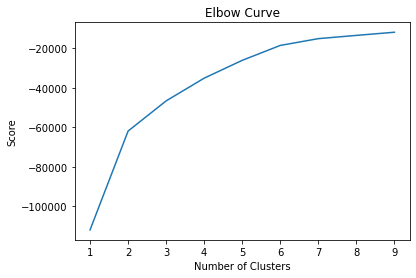

In [6]:
scaler = StandardScaler()
scaled_kmeans = pd.DataFrame(scaler.fit_transform(data[["Total New Add SQFT", "Total Job Valuation"]]),columns=["Total New Add SQFT","Total Job Valuation"])

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(scaled_kmeans).score(scaled_kmeans) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

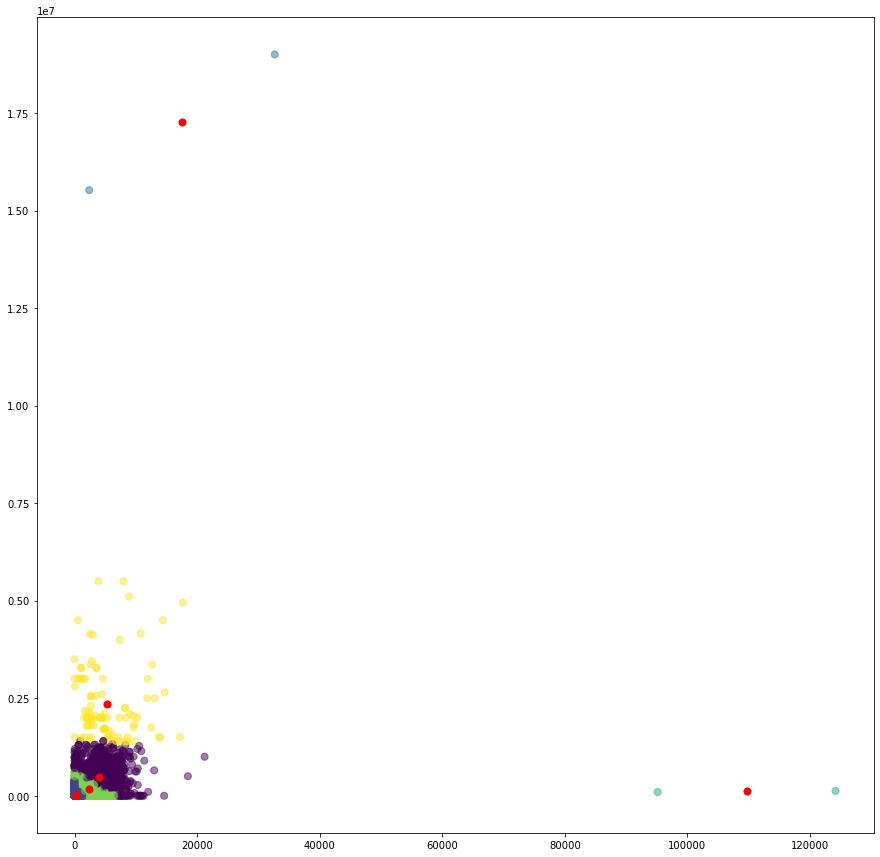

In [7]:
kmeans = KMeans(n_clusters = 6).fit(scaled_kmeans)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(15,15))
plt.scatter(data["Total New Add SQFT"], data["Total Job Valuation"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

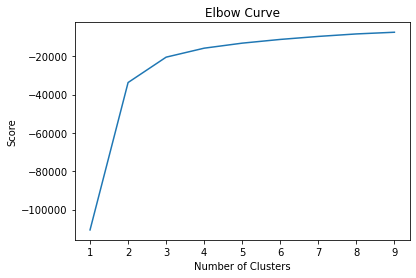

In [8]:
data_3std = data[(np.abs(stats.zscore(data[["Total New Add SQFT", "Total Job Valuation"]])) < 3).all(axis=1)]
scaled_kmeans = pd.DataFrame(scaler.fit_transform(data_3std[["Total New Add SQFT", "Total Job Valuation"]]),columns=["Total New Add SQFT","Total Job Valuation"])
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(scaled_kmeans).score(scaled_kmeans) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

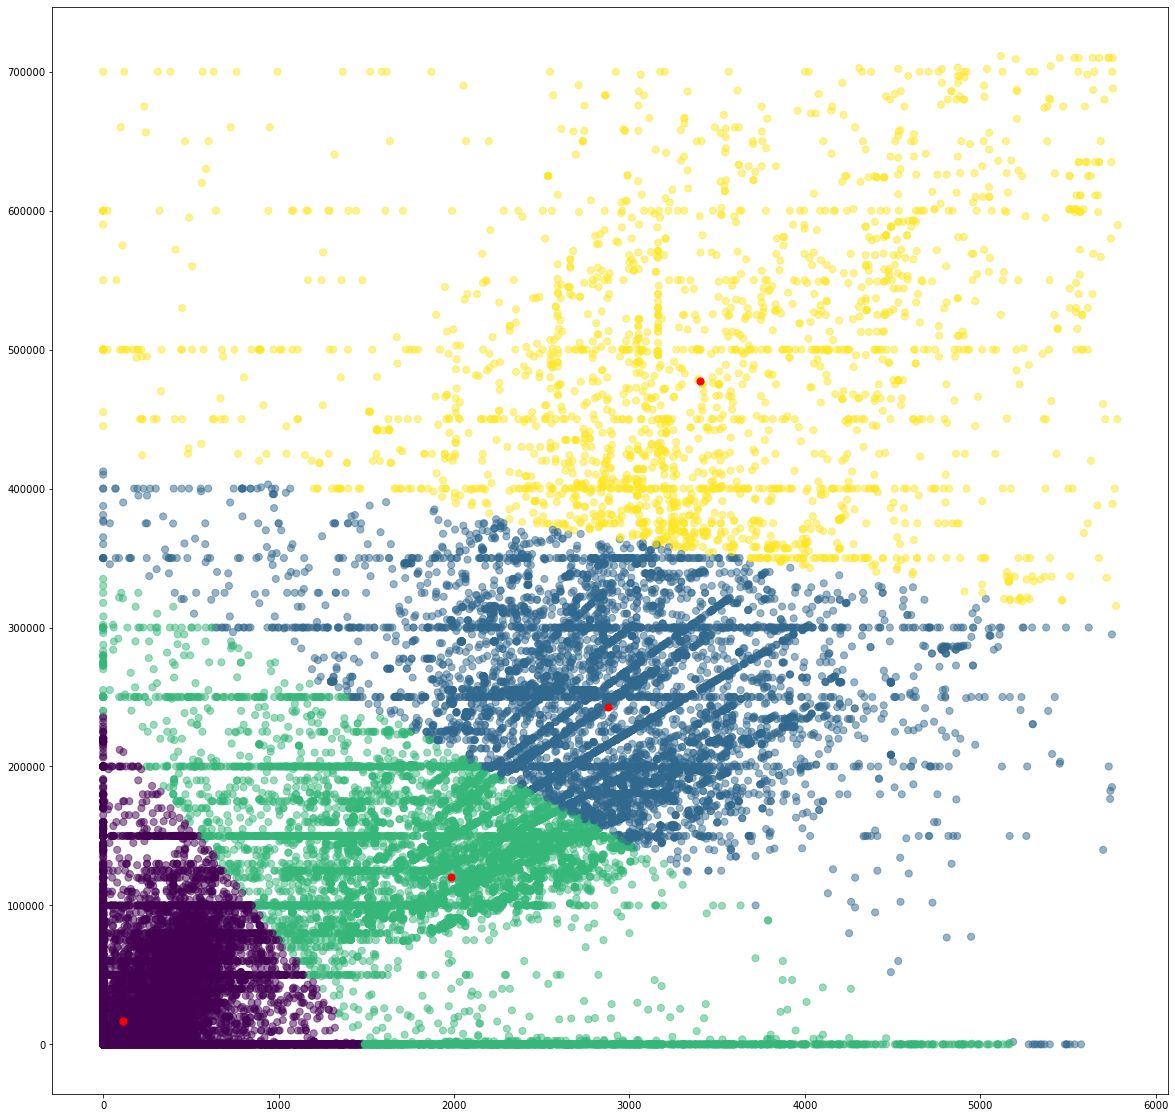

In [9]:
kmeans = KMeans(n_clusters = 4).fit(scaled_kmeans)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(20,20))
plt.scatter(data_3std["Total New Add SQFT"], data_3std["Total Job Valuation"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)

In [21]:
x = data_3std["Total New Add SQFT"].values.reshape(-1, 1)
y = data_3std["Total Job Valuation"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
classifier.score(x_test, y_test)

0.1555877034358047

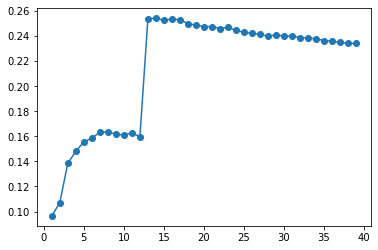

In [23]:
acc=[]
for i in range(1,40):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    acc.append(classifier.score(x_test, y_test))
plt.plot(range(1,40), acc, marker='o')

In [27]:
print(kmeans.labels_[50:123])

[0 0 0 0 2 0 0 2 2 0 0 0 1 2 1 0 0 0 2 0 0 3 3 3 0 3 2 0 1 2 2 1 2 1 1 2 0
 0 0 1 0 0 0 3 3 0 2 3 2 1 0 0 0 0 1 0 0 0 0 2 2 0 0 0 2 2 1 1 0 0 0 0 0]
